In [1]:
scores = '../out/ko_scores.txt'

In [2]:
# plotting imports
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

plt.rc('font', size=11)
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
plt.rc('axes', labelsize=12, titlesize=12)
plt.rc('legend', fontsize=11)

In [47]:
# other imports
import random
import numpy as np
import pandas as pd

In [117]:
m = pd.read_table(scores)

In [118]:
m['sick'] = np.zeros(m.shape[0])
m.loc[m[(m['score'] < 0) &
        (m['qvalue'] < 0.05)].index,
      'sick'] = 1

In [119]:
v = m.groupby(['strain', 'gene', 'position']).sum()['sick']

In [13]:
v = (m.groupby(['strain', 'gene', 'position']).sum()['sick'] /
     m.groupby(['strain', 'gene', 'position']).count()['sick'])

In [120]:
res = []
for strain in {x[0] for x in v.index}:
    y = v.loc[strain]
    genes = sorted(set(y.groupby('gene').count()[
                       y.groupby('gene').count() == 2
                       ].sort_values().index))
    for g in genes:
        res.append((strain, g, y.loc[g].mad(), 'same'))
        res.append((strain, g, y.loc[[g, random.choice(genes)]].mad(), 'shuffled'))
r = pd.DataFrame(res,
                 columns=['strain',
                          'gene',
                          'mad',
                          'set'])

**same genes have little variance in the number of phenotypes as compared to random gene pairs**

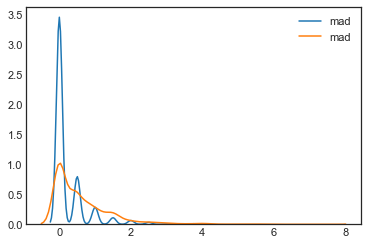

In [121]:
sns.kdeplot(r[r['set'] == 'same']['mad'])
sns.kdeplot(r[r['set'] == 'shuffled']['mad'])

**number of phenotypes conservation across strains**

In [122]:
genes = set()
m.set_index('gene', inplace=True)
s = len(set(m['strain']))
for g in set(m.index):
    if len(set(m.loc[g]['strain'])) == s:
        genes.add(g)

In [123]:
v = v.loc[(slice(None), sorted(genes))]

In [124]:
res = {}
for strain in {x[0] for x in v.index}:
    y = v.loc[strain]
    genes = {x[0]: x[1] for x in y.index}
    genes = [(x, genes[x]) for x in sorted(genes)]
    res[strain] = v.loc[(strain,
                        [x[0] for x in genes],
                        [x[1] for x in genes])].values

In [125]:
p = pd.DataFrame(res,
                 index=[x[0]
                        for x in genes])

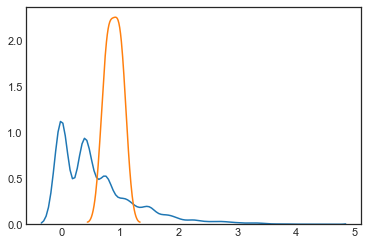

In [126]:
sns.kdeplot(p.T.mad())
w = p.copy(deep=True).T
for c in w.index:
    w.loc[c] = w.loc[c].sample(frac=1)
sns.kdeplot(w.T.mad())

In [166]:
m = pd.read_table(scores)
m['sick'] = np.zeros(m.shape[0])
m.loc[m[(m['score'] < 0) &
        (m['qvalue'] < 0.05)].index,
      'sick'] = 1
v = m.groupby(['strain', 'gene', 'position']).sum()['sick']
genes = sorted({y[1] for y in v.index} - {'WT', 'YOR202W'})
v = pd.Series([v.loc[slice(None), x].groupby('strain').max().mean()
               for x in genes],
              index=genes)

In [176]:
g0 = {x for x in v[v == 0].index}
g1 = {x for x in v[(v >= 1) &
                   (v <= 2)].index}
g2 = {x for x in v[(v >= 3) &
                   (v <= 5)].index}
g3 = {x for x in v[v > 5].index}

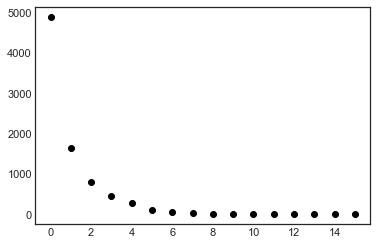

In [169]:
for i in range(int(v.max()+1)):
    plt.plot(i, v[v >= i].shape[0],
             'ko')

<h5><a href="javascript:toggle()" target="_self">toggle source code</a></h5>